# Rob Sandbox
- Tests and trials developed by Rob

# Imports

#### Standard library imports

#### Local application imports

#### Third party imports

In [1]:
import pandas as pd

import numpy as np

import networkx as nx

import scipy.sparse
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

---

# Reading data 

## Reading data from csv

In [2]:
df = pd.read_csv("Cooffending.csv")

In [3]:
df

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280454,670532,F,1112491,1330.0,NaN,NaN,NaN,58227,34.0,0,1,03/26/2009,2009
1280455,670533,M,78081,21702.0,NaN,NaN,NaN,46075,10.0,0,4,06/29/2009,2009
1280456,670534,M,187904,21201.0,21702.0,NaN,NaN,31015,1.0,0,4,03/16/2009,2009
1280457,670535,M,523837,21704.0,NaN,NaN,NaN,98806,1.0,0,1,10/18/2009,2009


## Initial data exploration

### CrimeIdentifier

#### How many CrimeIds are unique

In [ ]:
1 - len(df["CrimeIdentifier"].unique())/len(df["CrimeIdentifier"].notnull())

#### Which crimes have more than one CrimeID?

In [ ]:
dfx = df["CrimeIdentifier"].value_counts().to_frame()

# x = x[(x["CrimeIdentifier"] > 1) & (x["CrimeIdentifier"] < 10)]
dfx = dfx[(dfx["CrimeIdentifier"] > 10)]

dfx.value_counts()

## Histogram
# plt.hist(dfx["CrimeIdentifier"])
plt.hist(dfx["CrimeIdentifier"], bins=len(dfx["CrimeIdentifier"].unique()))

In [ ]:
ref_val = 23610
df[df["CrimeIdentifier"] == ref_val]

### CrimeTypeX

#### How many unique CrimeType1 are there?

In [ ]:
len(df["CrimeType1"].unique())

In [ ]:
len(df["CrimeType2"].unique())

In [ ]:
len(df["CrimeType3"].unique())

In [ ]:
len(df["CrimeType4"].unique())

---

# Analysis 1: Building matrix relating *Crime type* and *Municipality*

In [ ]:
dfx = df.copy()

## Defining relevant columns

In [ ]:
rc = ["CrimeType1", "Municipality"]
dfx = dfx.loc[:, rc]

## Cleaning and preparing original data

### Eliminating rows with null values

In [ ]:
dfx.info()

In [ ]:
dfx = dfx.loc[dfx["CrimeType1"].notnull(), :]

### Reindexing and reformatting

In [ ]:
for col in dfx.columns:
    dfx[col] = dfx[col].astype("int64")
    dfx[col] = pd.factorize(dfx[col])[0]

### Simplified matrix

In [ ]:
dfx = np.column_stack(
    [
        np.ones(dfx.shape[0], dtype=int),
        np.array(dfx["CrimeType1"]),
        np.array(dfx["Municipality"])
    ]
)

dfx.shape

### Data as sparse matrix

In [ ]:
crime_matrix = csr_matrix(
    (
        dfx[:, 0].sum(),
        (dfx[:, 1], dfx[:, 2])
    ),
    shape=(
        dfx[:, 1].max() + 1,
        dfx[:, 2].max() + 1
    )
)

### Adjacency matrix

In [ ]:
A = crime_matrix*crime_matrix.T 

---

# Analysis 2: Relating *OffenderId* and *Municipality*

In [ ]:
dfx = df.copy()

## Defining relevant columns

In [ ]:
rc = ["OffenderIdentifier", "Municipality"]
# dfx = dfx.loc[:, rc]

## Cleaning and preparing original data

### Eliminating rows with null values

In [ ]:
dfx.info()

### Eliminating duplicated rows

In [ ]:
dfx = dfx.drop_duplicates(subset=rc)

### Reindexing and reformatting

In [ ]:
for col in rc:
    dfx[col] = dfx[col].astype("int64")
    dfx[col] = pd.factorize(dfx[col])[0]

### To numpy array

In [ ]:
dfx = np.column_stack(
    [
        np.ones(dfx.shape[0], dtype=int),
        np.array(dfx[rc[0]]),
        np.array(dfx[rc[1]])
    ]
)

dfx.shape

### Data as sparse matrix

In [ ]:
crime_matrix = csr_matrix(
    (
        dfx[:, 0],
        (dfx[:, 1], dfx[:, 2])
    ),
    shape=(
        dfx[:, 1].max() + 1,
        dfx[:, 2].max() + 1
    )
)

### Adjacency matrix

In [ ]:
A = crime_matrix*crime_matrix.T 

#### Cleaning adjacency matrix

In [ ]:
## Eliminating self loops
A.setdiag(0)

## Eliminating zeros
A.eliminate_zeros()

## Working with graph object

---

# Test run with base code (*Crime type* and *Municipality*)

## Cleaning data

### Eliminating duplicated rows

In [6]:
rc = ["CrimeType1", "Municipality"]

In [7]:
dfxc = df.drop_duplicates(subset=rc).copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280459 entries, 0 to 1280458
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   OffenderIdentifier    1280459 non-null  int64  
 1   OffenderGender        1280459 non-null  object 
 2   CrimeIdentifier       1280459 non-null  int64  
 3   CrimeType1            1279009 non-null  float64
 4   CrimeType2            150352 non-null   float64
 5   CrimeType3            30052 non-null    float64
 6   CrimeType4            6926 non-null     float64
 7   Municipality          1280459 non-null  int64  
 8   CrimeLocation         1140448 non-null  float64
 9   NumberYouthOffenders  1280459 non-null  int64  
 10  NumberAdultOffenders  1280459 non-null  int64  
 11  CrimeDate             1280459 non-null  object 
 12  CrimeYear             1280459 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 127.0+ MB


### Reformatting columns for adjacent matrix

In [8]:
for col in rc:
    dfxc[col] = dfxc[col].astype("category").astype("int64")

ValueError: Cannot convert float NaN to integer

### Reindexing selected variables

In [6]:
dfxc["Crimen"] = pd.factorize(dfxc["CrimeIdentifier"])[0]
dfxc["Criminales"] = pd.factorize(dfxc["OffenderIdentifier"])[0]

---

# Creating matrix for analysis

## Converting to numpy array and creating simplified matrix

In [7]:
column = np.array(dfxc["Crimen"]) 
row = np.array(dfxc["Criminales"])

dfxc[['Criminales','Crimen']]

dfxf = np.column_stack([np.ones((dfxc.shape[0]), dtype=int), row, column])
dfxf.shape

(1279987, 3)

## Generating adjacency matrix

### Data with sparse matrix

In [8]:
crime_matrix = csr_matrix(
    (dfxf[:, 0], (dfxf[:, 1], dfxf[:, 2])),
    shape=(row.max() + 1, dfxf[:, 2].max() + 1)
)

### Adjacency matrix

In [9]:
A = crime_matrix*crime_matrix.T

---

# Creating Graph object

## Eliminating self loops


In [10]:
A.setdiag(0)

## Eliminate zeros
- Keeping only data with common crimes

In [11]:
A.eliminate_zeros()

## Creating graph and editing graph

### Generate graph

In [12]:
G = nx.from_scipy_sparse_matrix(A)

### Eliminate nodes without edges

In [13]:
G.remove_nodes_from(list(nx.isolates(G))) #len(list(nx.isolates(G)))

# Exploring graph object

## Initial graph data

In [14]:
G.number_of_nodes()

121159

In [15]:
G.number_of_edges()

178413

## Histogram with cluster's coefficient

(array([72832.,  1535.,  1345.,  4035.,  1116.,  1919.,  1005.,   313.,
          361., 36698.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

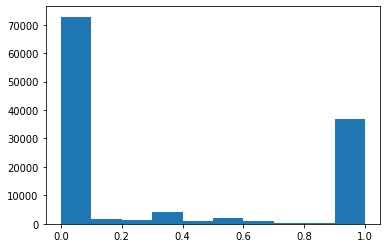

In [16]:
data = list(nx.clustering(G).items())
H = np.array(data)

plt.hist(H[:, 1])

## Filtering connections with high weights

### Creating new graph object

In [17]:
Gf = nx.from_scipy_sparse_matrix(A)
Gf.remove_nodes_from(list(nx.isolates(G)))

### Removing all nodes with less edges than the value specified

In [18]:
threshold = 2

In [19]:
Gf_edges = list(Gf.edges())
Gf_edges_weight = nx.get_edge_attributes(Gf, "weight")

for e in Gf_edges:
    if Gf_edges_weight[e] < threshold:
        Gf.remove_edge(e[0], e[1])
        

In [20]:
Gf.remove_nodes_from(list(nx.isolates(Gf)))

In [21]:
Gf.number_of_nodes()

17764

## Network graph

In [ ]:
nx.draw(
    Gf,
    pos=nx.drawing.nx_agraph.graphviz_layout(Gf),
    with_labels=True
)

---

---
---